In [15]:
%load_ext autoreload
%autoreload 2

In [5]:
"""
How to make net:
    1) read lsoa data: code, centroid, boundaries (to make a wrapping polygon)
    'gmdata.nosync/infuse_lsoa_lyr_2011.shp'

    2) read lsoa connections data: lsoa_connections.json
    'gmdata.nosync/lsoa_connections.json'

    3) somehow verify data
    4) make nodes file from regions
    5) make edges from connections

How to make routes:
    1) read OD matrix
    file? AreaOriginDistanceMatrix().csv_path = 
    'gmdata.nosync/commute-lsoa-greater-manchester-od_attributes.csv'
    2) make trips class similar to EdgesXML and NodesXML (RoutesXML)
    3) write trips from OD matrix to rou.xml
    4) run duarouter to make routes from trips ((first_edge,last_edge) => path with N edges)
"""
pass

In [7]:
import geopandas as gpd

In [ ]:
from bim.sumo import network

## LSOA SUMO nodes

In [8]:
lsoa_boundaries_gdf = gpd.read_file('gmdata.nosync/infuse_lsoa_lyr_2011.shp')
len(lsoa_boundaries_gdf)

42619

In [22]:
nodes_xml = network.NodesXML()
node_type = "priority"
for i in range(len(lsoa_boundaries_gdf)):
    lsoa_record = lsoa_boundaries_gdf.iloc[i]
    centroid = lsoa_record.geometry.centroid
    nodes_xml.add_node(lsoa_record.geo_code, centroid.x, centroid.y, node_type)

In [23]:
nodes_xml.save('gmdata.nosync/lsoa_nodes.nod.xml')

## LSOA SUMO edges

In [26]:
# lsoa_boundaries_gdf

In [9]:
import json

In [10]:
with open('gmdata.nosync/lsoa_connections.json', 'r') as f:
    connected = json.load(f)

In [11]:
connected

[['E01005332', 'E01005341'],
 ['E01005353', 'E01032921'],
 ['E01004769', 'E01004770'],
 ['E01005849', 'E01005851'],
 ['E01005482', 'E01005564'],
 ['E01005407', 'E01005412'],
 ['E01006213', 'E01006329'],
 ['E01006248', 'E01006376'],
 ['E01005365', 'E01005378'],
 ['E01005506', 'E01005507'],
 ['E01004866', 'E01004925'],
 ['E01005727', 'E01005728'],
 ['E01005093', 'E01005094'],
 ['', 'E01006042'],
 ['E01006278', 'E01006279'],
 ['E01005895', 'E01005921'],
 ['E01005871', 'E01005877'],
 ['E01005449', 'E01005451'],
 ['E01005490', 'E01005581'],
 ['E01005125', 'E01005305'],
 ['E01005359', 'E01005394'],
 ['', 'E01005836'],
 ['E01004915', 'E01005010'],
 ['E01004840', 'E01004920'],
 ['E01005202', 'E01005249'],
 ['E01006097', 'E01006098'],
 ['E01005008', 'E01005013'],
 ['', 'E01004887'],
 ['E01005295', 'E01005770'],
 ['E01005162', 'E01005646'],
 ['E01005108', 'E01005190'],
 ['E01004773', 'E01004774'],
 ['E01005257', 'E01005261'],
 ['E01005313', 'E01005314'],
 ['E01005642', 'E01005644'],
 ['E01005160

In [193]:
connected[4862]

['E01005126', 'E01005176']

In [27]:
edges_xml = network.EdgesXML()
speed = 50
priority = 2
numLanes = 2
for i in range(len(connected)):
    lsoa_from, lsoa_to = connected[i]
    if not lsoa_from or not lsoa_to:
        continue
    centroid = lsoa_record.geometry.centroid
    edges_xml.add_edge(f"edge{i}", lsoa_from, lsoa_to, priority, numLanes, speed)

In [ ]:
edges_xml.save('gmdata.nosync/lsoa_edges.edg.xml')

In [194]:
!cat gmdata.nosync/lsoa_edges.edg.xml | grep -A 2 "edge4862"

  <edge id="edge4862" from="E01005126" to="E01005176" priority="2" numLanes="2" speed="50"/>
  <edge id="edge4863" from="E01005030" to="E01005060" priority="2" numLanes="2" speed="50"/>
  <edge id="edge4864" from="E01004962" to="E01004964" priority="2" numLanes="2" speed="50"/>


In [30]:
# !netconvert --node-files=gmdata.nosync/lsoa_nodes.nod.xml --edge-files=gmdata.nosync/lsoa_edges.edg.xml \
#   --output-file=gmdata.nosync/lsoa_net.net.xml

Success.


In [241]:
# !head -n 100 gmdata.nosync/lsoa_net.net.xml 

In [1]:
# !cat gmdata.nosync/lsoa_net.net.xml | grep -B 2 "edge4862"

In [33]:
!head -n 100 gmdata.nosync/lsoa_net.net.xml

<?xml version="1.0" encoding="UTF-8"?>

<!-- generated on 2023-08-01 23:12:03 by Eclipse SUMO netconvert Version 1.18.0
<configuration xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/netconvertConfiguration.xsd">

    <input>
        <node-files value="gmdata.nosync/lsoa_nodes.nod.xml"/>
        <edge-files value="gmdata.nosync/lsoa_edges.edg.xml"/>
    </input>

    <output>
        <output-file value="gmdata.nosync/lsoa_net.net.xml"/>
    </output>

</configuration>
-->

<net version="1.16" junctionCornerDetail="5" limitTurnSpeed="5.50" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/net_file.xsd">

    <location netOffset="-354526.87,-384055.98" convBoundary="0.00,0.00,45539.47,33262.03" origBoundary="11156.57,13012.59,655420.89,1204369.03" projParameter="!"/>

    <edge id=":E01004767_0" function="internal">
        <lane id=":E01004767_0_0" index="0" speed="5.52"

## LSOA SUMO routes from OD matrix

In [40]:
connected[3973], connected[1111]

(['E01005635', 'E01005719'], ['E01005536', 'E01005539'])

In [45]:
from collections import defaultdict

In [176]:
connected_dict = {lsoa_code:i for i, lsoa_pair in enumerate(list(map(tuple, connected))) 
                  for lsoa_code in lsoa_pair if '' not in lsoa_pair}

In [177]:
len(connected_dict)

1577

In [59]:
# edges['E01005722']

In [81]:
edges = defaultdict(set)
for node_from, node_to in connected:
    edges[node_from].add(node_to)
    edges[node_to].add(node_from)

In [84]:
def dfs(node, target_node):
    visited = set()
    stack = [node]
    while stack:
        n = stack.pop()
        if n == target_node:
            return True
        for n2 in edges[n]:
            if n2 not in visited:
                stack.append(n2)
                visited.add(n2)
    return False

In [85]:
dfs('E01005126', 'E01005168')

True

In [67]:
connected[4159]

['E01005126', 'E01005168']

In [60]:
from bim.gis.traffic import od_matrix

In [61]:
area_od_matrix = od_matrix.AreaOriginDistanceMatrix()

In [178]:
od_gm_df = area_od_matrix.load()

In [179]:
od_gm_df['trip_edge_from'] = od_gm_df.apply(lambda x: connected_dict.get(x['geo_code1'], -1), axis=1)

In [180]:
od_gm_df['trip_edge_to'] = od_gm_df.apply(lambda x: connected_dict.get(x['geo_code2'], -1), axis=1)

In [181]:
od_gm_df = od_gm_df[(od_gm_df['trip_edge_from'] != -1) & (od_gm_df['trip_edge_to'] != -1)].copy()

In [182]:
od_gm_df

,id,geo_code1,geo_code2,geo_name1,geo_name2,lad11cd1,lad11cd2,lad_name1,lad_name2,all,...,rf_dist_km,rq_dist_km,dist_rf_e,dist_rq_rf,rf_avslope_perc,rq_avslope_perc,rf_time_min,rq_time_min,trip_edge_from,trip_edge_to
0,E01004766 E01004766,E01004766,E01004766,Bolton 005A,Bolton 005A,E08000001,E08000001,Bolton,Bolton,33,...,0.287,NaN,NaN,NaN,2.84,NaN,NaN,NaN,3449,3449
1,E01004766 E01004767,E01004766,E01004767,Bolton 005A,Bolton 005B,E08000001,E08000001,Bolton,Bolton,35,...,0.979,1.072,1.779659,1.094995,2.86,1.865672,4.20,4.216667,3449,4312
3,E01004766 E01004769,E01004766,E01004769,Bolton 005A,Bolton 003A,E08000001,E08000001,Bolton,Bolton,18,...,2.020,2.067,1.356207,1.021245,2.27,3.483309,10.70,13.800000,3449,4827
4,E01004766 E01004770,E01004766,E01004770,Bolton 005A,Bolton 003B,E08000001,E08000001,Bolton,Bolton,18,...,1.420,1.456,1.270638,1.022472,2.67,2.609890,7.35,7.200000,3449,2841
5,E01004766 E01004771,E01004766,E01004771,Bolton 005A,Bolton 003C,E08000001,E08000001,Bolton,Bolton,24,...,1.570,1.573,1.350337,1.000000,3.05,3.051494,9.60,9.600000,3449,3417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100718,E01033685 E01033685,E01033685,E01033685,Manchester 003F,Manchester 003F,E08000003,E08000003,Manchester,Manchester,3,...,0.295,NaN,NaN,NaN,1.17,NaN,NaN,NaN,4697,4697
100719,E01033685 E01033687,E01033685,E01033687,Manchester 003F,Manchester 003G,E08000003,E08000003,Manchester,Manchester,9,...,0.986,0.667,1.693336,0.676471,1.62,0.599700,4.70,6.700000,4697,4533
100723,E01033686 E01033686,E01033686,E01033686,Manchester 028F,Manchester 028F,E08000003,E08000003,Manchester,Manchester,4,...,0.234,NaN,NaN,NaN,0.27,NaN,NaN,NaN,4890,4890
100727,E01033687 E01033687,E01033687,E01033687,Manchester 003G,Manchester 003G,E08000003,E08000003,Manchester,Manchester,15,...,0.311,NaN,NaN,NaN,0.79,NaN,NaN,NaN,4533,4533


In [214]:
import numpy as np

In [220]:
routes_xml = network.RoutesXML()
depart = 0
for i in range(len(od_gm_df)):
    od_record = od_gm_df.iloc[i]
    edge_from, edge_to = od_record.trip_edge_from, od_record.trip_edge_to
    routes_count = od_record['all']
    departs = depart + np.random.normal(10, 5, routes_count)
    for j in range(routes_count):
        routes_xml.add_trip(f"{i}#{j}", max(0, departs[j]), f"edge{edge_from}", f"edge{edge_to}")

In [222]:
routes_xml.save("gmdata.nosync/lsoa_trips_od.rou.xml")

In [224]:
# !wc -l gmdata.nosync/lsoa_trips_od.rou.xml

In [192]:
list(filter(lambda x: 'E01005126' in x[1], enumerate(connected)))

[(110, ['E01005119', 'E01005126']),
 (661, ['E01005121', 'E01005126']),
 (727, ['E01005123', 'E01005126']),
 (862, ['E01005126', 'E01005852']),
 (1102, ['E01005126', 'E01005305']),
 (1542, ['E01005126', 'E01005858']),
 (1782, ['E01005126', 'E01005174']),
 (2404, ['E01005126', 'E01005175']),
 (2865, ['E01005126', 'E01005306']),
 (3241, ['E01005125', 'E01005126']),
 (4146, ['E01005126', 'E01005172']),
 (4159, ['E01005126', 'E01005168']),
 (4191, ['E01005126', 'E01005311']),
 (4413, ['E01005124', 'E01005126']),
 (4862, ['E01005126', 'E01005176'])]

In [189]:
od_gm_df.iloc[1858:1859]

,id,geo_code1,geo_code2,geo_name1,geo_name2,lad11cd1,lad11cd2,lad_name1,lad_name2,all,...,rf_dist_km,rq_dist_km,dist_rf_e,dist_rq_rf,rf_avslope_perc,rq_avslope_perc,rf_time_min,rq_time_min,trip_edge_from,trip_edge_to
2575,E01004787 E01005126,E01004787,E01005126,Bolton 013A,Manchester 045A,E08000001,E08000003,Bolton,Manchester,3,...,26.8,32.519001,1.209673,1.21471,1.68,1.494511,102.73333,133.98334,3703,4862


In [2]:
!head -n 100 gmdata.nosync/lsoa_raw_routes.rou.xml | tail -n 50

    <vehicle id="152" depart="152.00">
        <route edges="edge1678 edge1584"/>
    </vehicle>
    <vehicle id="163" depart="163.00">
        <route edges="edge254 edge4970 edge4958 edge925 edge2461 edge224 edge686"/>
    </vehicle>
    <vehicle id="167" depart="167.00">
        <route edges="edge5045 edge4979"/>
    </vehicle>
    <vehicle id="177" depart="177.00">
        <route edges="edge860 edge56 edge3119 edge161 edge3997 edge5039 edge2357 edge1807"/>
    </vehicle>
    <vehicle id="195" depart="195.00">
        <route edges="edge56 edge118 edge4227 edge4889 edge1235 edge3538 edge3869"/>
    </vehicle>
    <vehicle id="289" depart="289.00">
        <route edges="edge3016 edge1150 edge1576 edge4396"/>
    </vehicle>
    <vehicle id="425" depart="425.00">
        <route edges="edge5047 edge2371 edge4663 edge1160"/>
    </vehicle>
    <vehicle id="437" depart="437.00">
        <route edges="edge504 edge707 edge2192 edge2971 edge2019 edge489 edge3669 edge3771 edge3210 edge440 edge3

In [225]:
!duarouter -n gmdata.nosync/lsoa_net.net.xml -t gmdata.nosync/lsoa_trips_od.rou.xml -o gmdata.nosync/lsoa_od_raw_routes.rou.xml --ignore-errors 2&> gmdata.nosync/duarouter.log

Success.up to time step: 200.28


In [226]:
!wc -l gmdata.nosync/duarouter.log

 3618918 gmdata.nosync/duarouter.log


In [233]:
def plot_code(geo_code):
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    gm_boundary.plot(ax=ax, alpha=0.2)
    lsoa_boundaries_gdf[lsoa_boundaries_gdf['geo_code'] == geo_code].to_crs(epsg=4326).plot(ax=ax)
    plt.show()

In [237]:
# plot_code('E01006309')

In [212]:
dfs(connected[4923][0], connected[4668][0])

True

In [8]:
# !tail -n 50 gmdata.nosync/duarouter.log

In [227]:
!wc -l gmdata.nosync/lsoa_od_raw_routes.rou.xml

  318362 gmdata.nosync/lsoa_od_raw_routes.rou.xml


In [206]:
!wc -l gmdata.nosync/lsoa_od_raw_routes.rou.xml

   27641 gmdata.nosync/lsoa_od_raw_routes.rou.xml


In [207]:
!head -n 40 gmdata.nosync/lsoa_od_raw_routes.rou.xml

<?xml version="1.0" encoding="UTF-8"?>

<!-- generated on 2023-08-02 18:36:33 by Eclipse SUMO duarouter Version 1.18.0
<configuration xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/duarouterConfiguration.xsd">

    <input>
        <net-file value="gmdata.nosync/lsoa_net.net.xml"/>
        <route-files value="gmdata.nosync/lsoa_trips_od.rou.xml"/>
    </input>

    <output>
        <output-file value="gmdata.nosync/lsoa_od_raw_routes.rou.xml"/>
    </output>

    <report>
        <ignore-errors value="true"/>
    </report>

</configuration>
-->

<routes xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/routes_file.xsd">
    <vehicle id="0" depart="0.00">
        <route edges="edge3449"/>
    </vehicle>
    <vehicle id="5" depart="0.00">
        <route edges="edge3449"/>
    </vehicle>
    <vehicle id="7" depart="0.00">
        <route edges="edge3449 edge2032"/>
    </ve

In [6]:
!head -n 50 gmdata.nosync/lsoa_trips_od.rou.xml

<?xml version='1.0' encoding='UTF-8'?>
<routes xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/routes_file.xsd">
  <trip id="0#0" depart="0.2839091728633347" from="edge3449" to="edge3449"/>
  <trip id="0#1" depart="13.046474648785203" from="edge3449" to="edge3449"/>
  <trip id="0#2" depart="17.639114398419096" from="edge3449" to="edge3449"/>
  <trip id="0#3" depart="0" from="edge3449" to="edge3449"/>
  <trip id="0#4" depart="14.539289021380368" from="edge3449" to="edge3449"/>
  <trip id="0#5" depart="4.191768158396889" from="edge3449" to="edge3449"/>
  <trip id="0#6" depart="9.57621112353722" from="edge3449" to="edge3449"/>
  <trip id="0#7" depart="20.2093415456012" from="edge3449" to="edge3449"/>
  <trip id="0#8" depart="16.524600283029383" from="edge3449" to="edge3449"/>
  <trip id="0#9" depart="4.469820143070427" from="edge3449" to="edge3449"/>
  <trip id="0#10" depart="5.644709371905857" from="edge3449" to="edge3449"/>
  <

## Search for OD LSOA's missed in LSOA connections

In [90]:
no_od_edge_set = set(od_gm_df[od_gm_df.apply(lambda x: edges.get(x['geo_code1'], -1) ==-1, axis=1)]['geo_code1'])

In [92]:
len(no_od_edge_set)

367

In [93]:
len(set(od_gm_df['geo_code1']))

1946

In [99]:
set([lsoa_code for lsoa_pair in connected for lsoa_code in lsoa_pair]).intersection(no_od_edge_set)

set()

In [100]:
len(set([lsoa_code for lsoa_pair in connected for lsoa_code in lsoa_pair]))

1580

In [110]:
import matplotlib.pylab as plt

<Axes: >

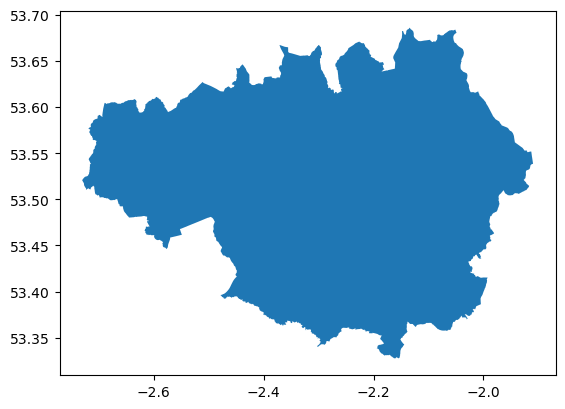

In [112]:
counties_region_gdf = gpd.read_file("gmdata.nosync/Boundary-line-ceremonial-counties_region.shp")
gm_boundary = counties_region_gdf[counties_region_gdf['NAME'].apply(lambda x: 'manchester' in x.lower())]
gm_boundary = gm_boundary.to_crs(epsg=4326)
gm_boundary.plot()

E01010952


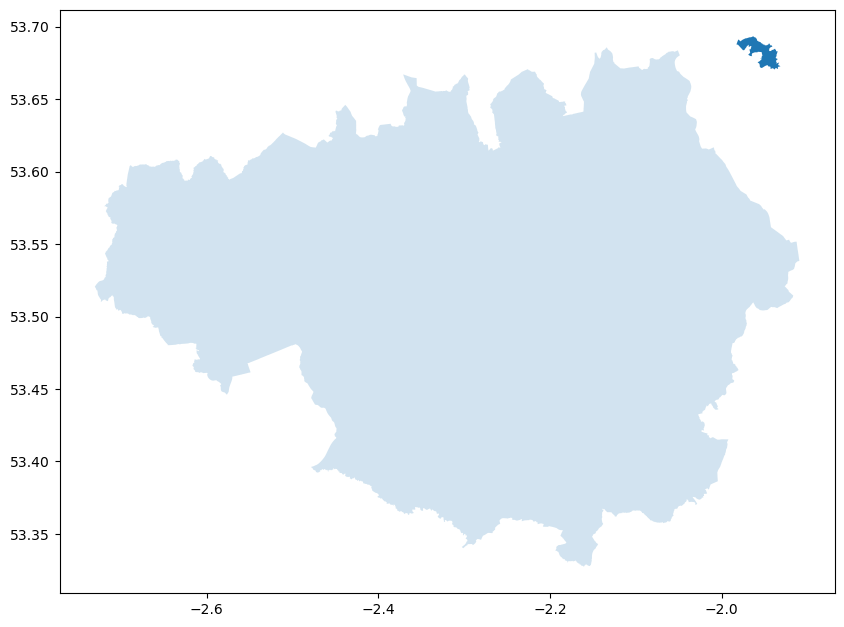

E01012475


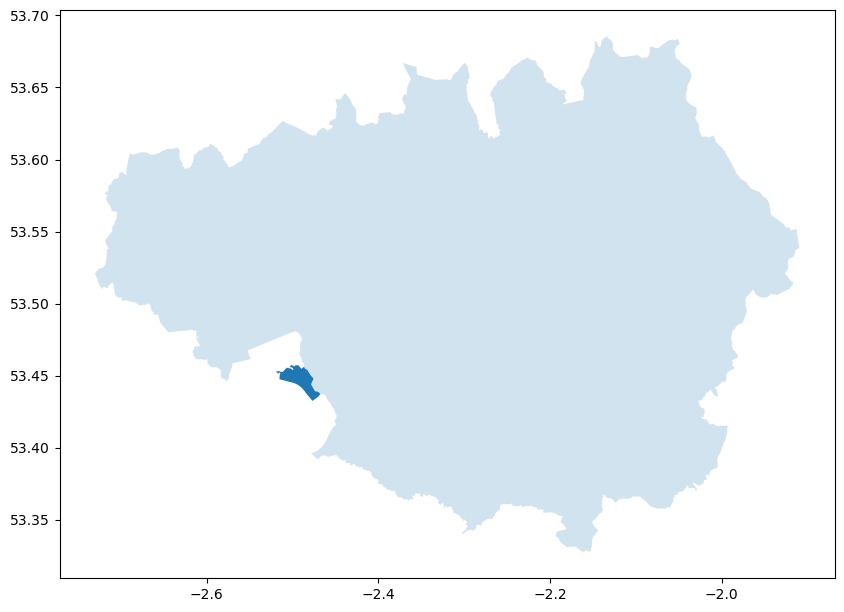

E01019747


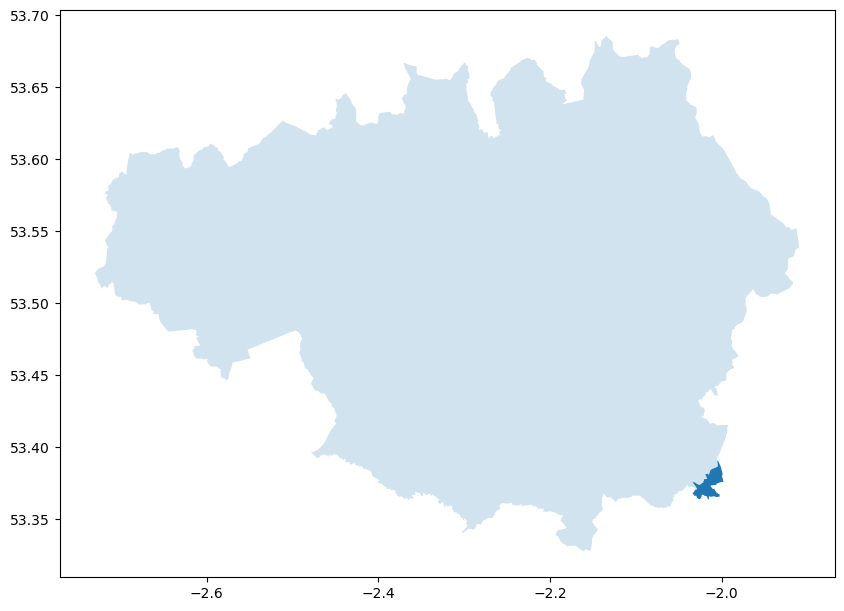

E01012550


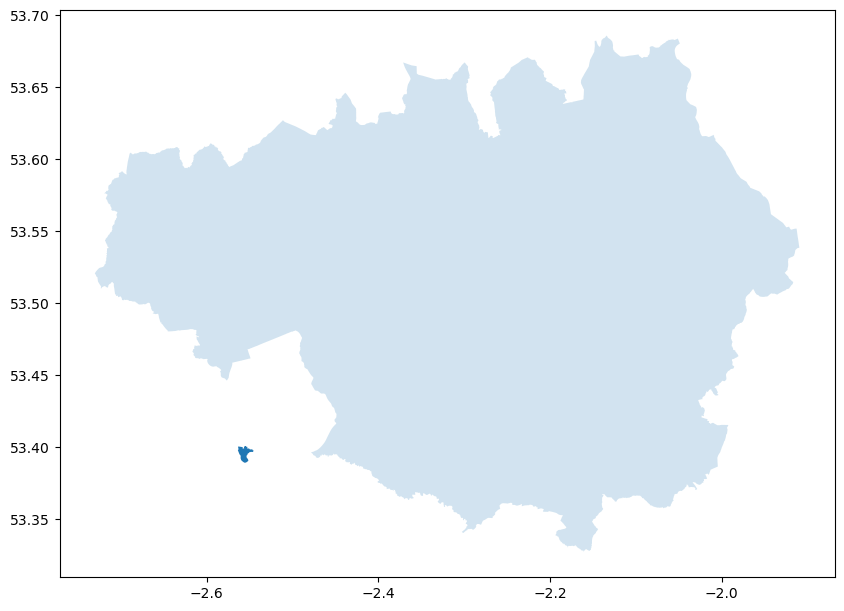

E01005022


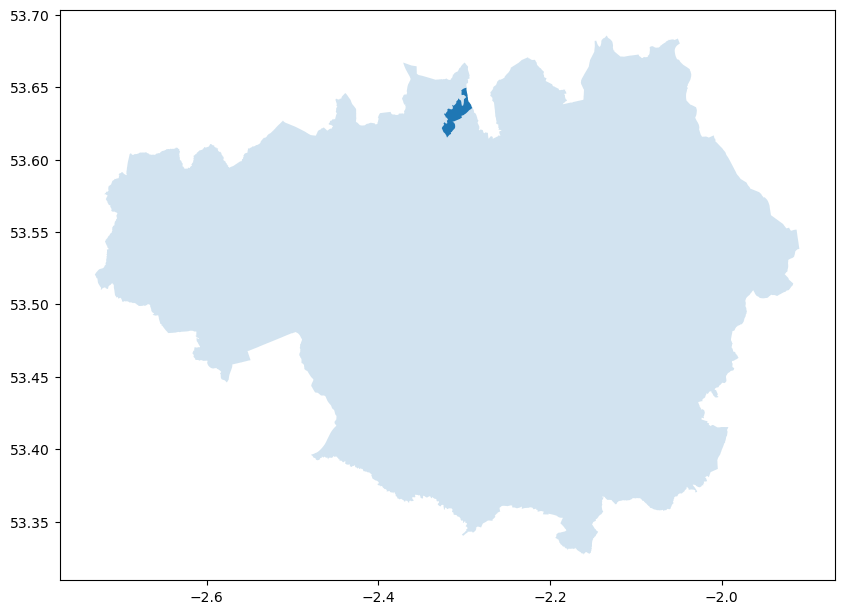

E01018598


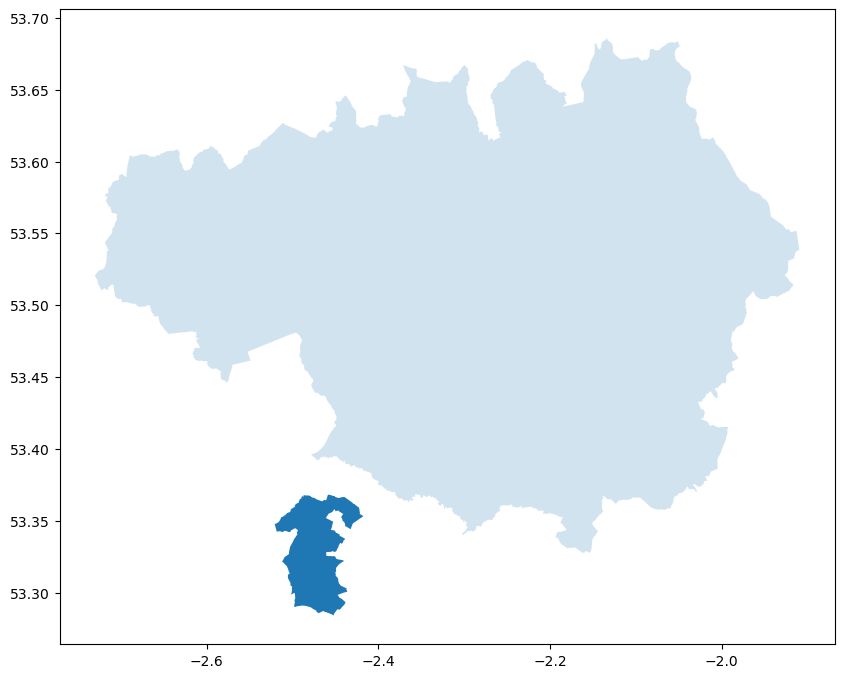

E01012489


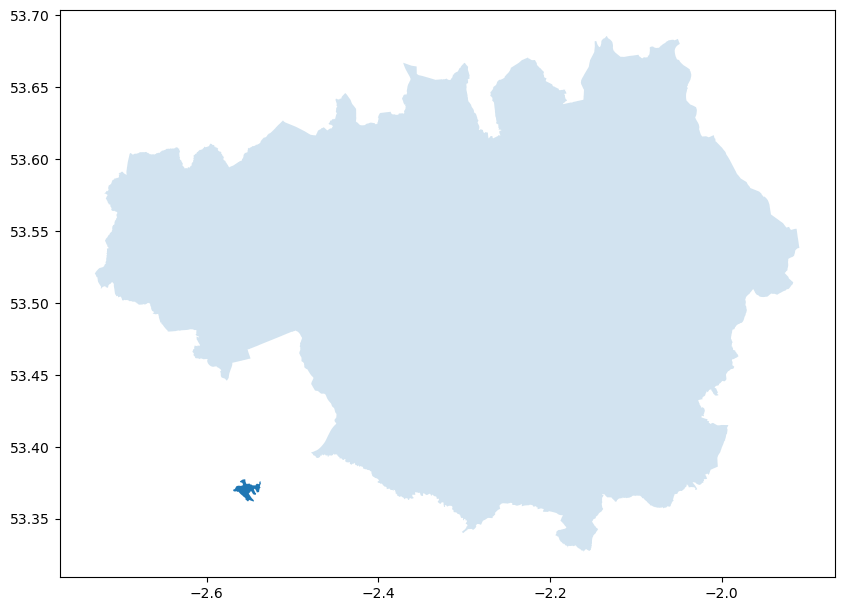

E01018667


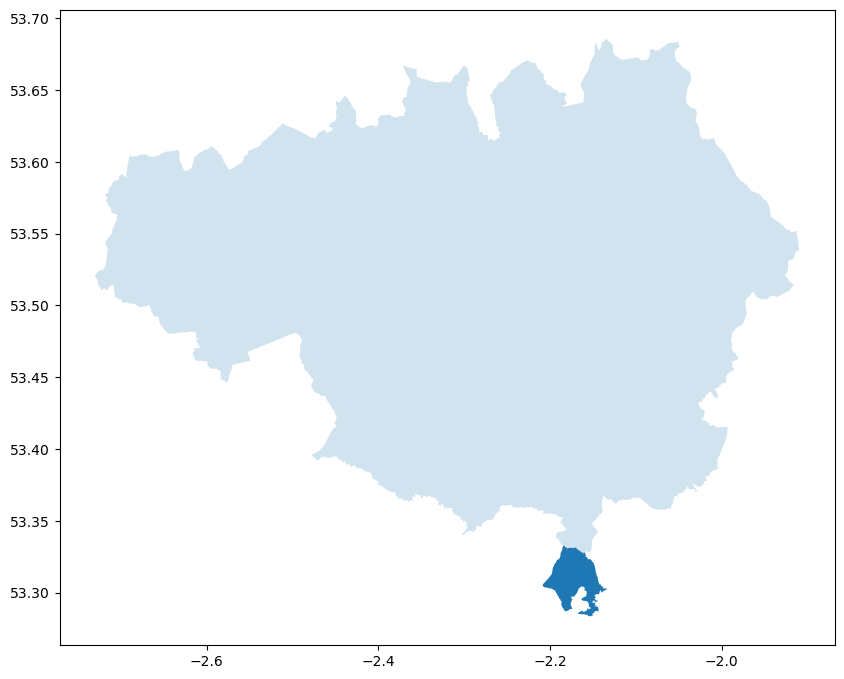

E01012598


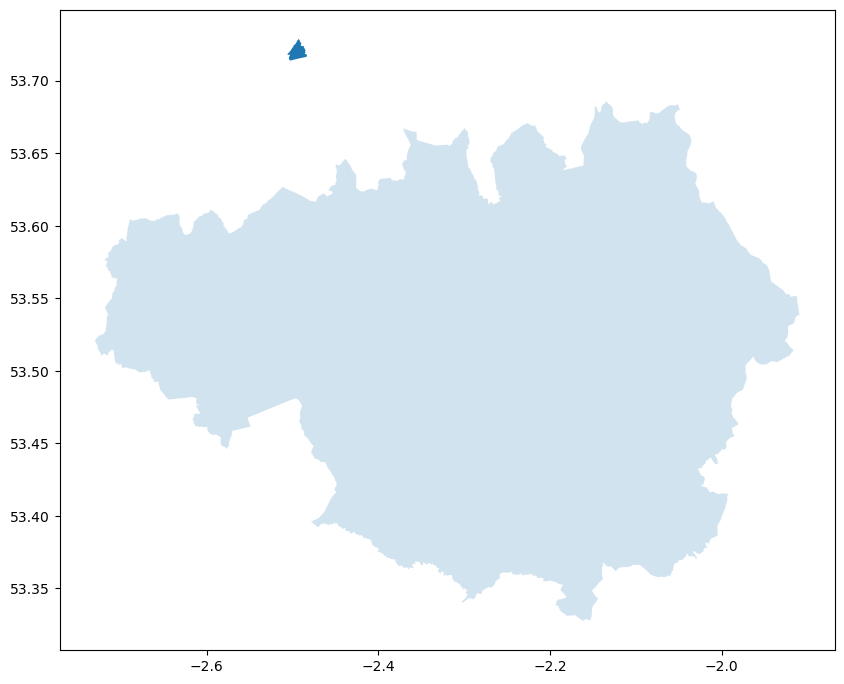

E01004768


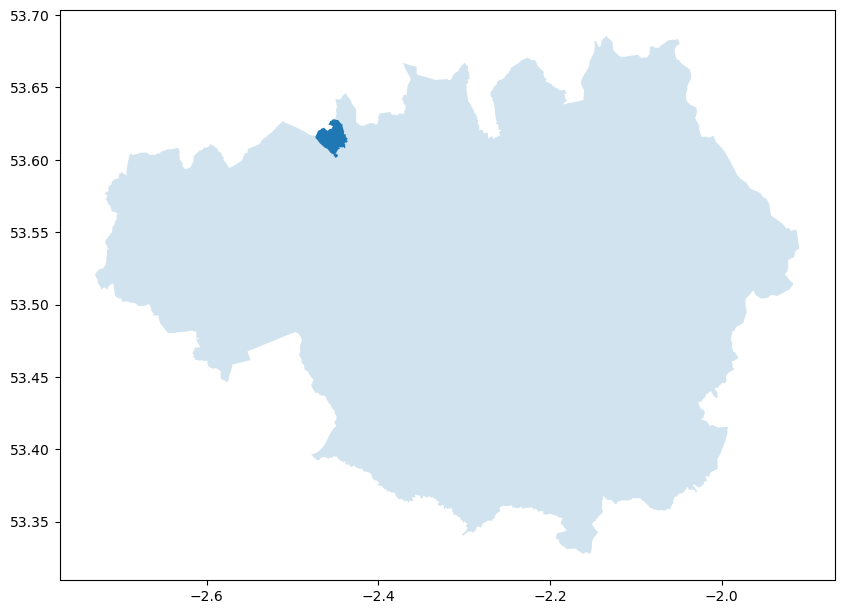

E01011083


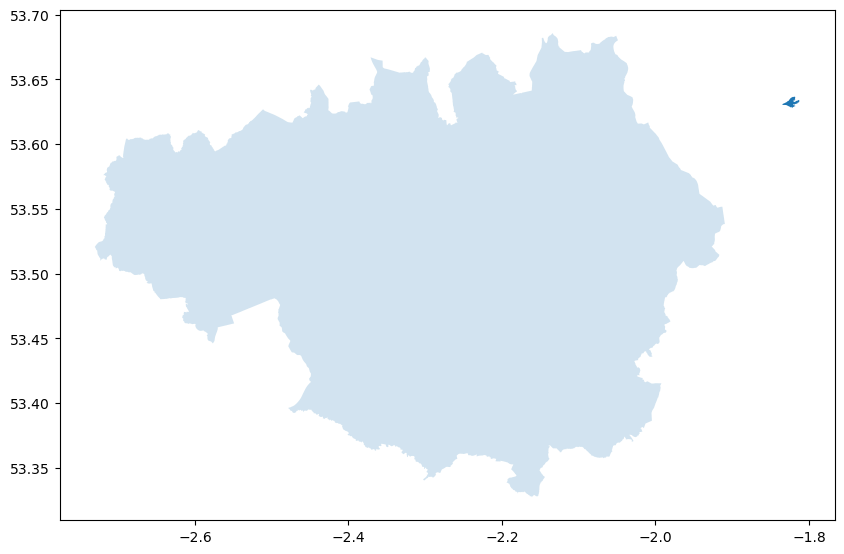

In [235]:
for i, missed_lsoa in enumerate(no_od_edge_set):
    print(missed_lsoa)
    plot_code(missed_lsoa)
    if i >= 10:
        break

In [ ]:
# CONCLUSION: all missed regions (with no connected to them by roads): outside or on the boarder of main GM area

### LSOA routes file

In [5]:
!head -n 50 gmdata.nosync/lsoa_routes.rou.xml | tail -n 40

<routes xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/routes_file.xsd">
    <trip id="0" depart="0.00" from="edge3973" to="edge1111"/>
    <trip id="1" depart="1.00" from="edge2262" to="edge202"/>
    <trip id="2" depart="2.00" from="edge4410" to="edge4147"/>
    <trip id="3" depart="3.00" from="edge5133" to="edge1400"/>
    <trip id="4" depart="4.00" from="edge2953" to="edge1132"/>
    <trip id="5" depart="5.00" from="edge1998" to="edge3353"/>
    <trip id="6" depart="6.00" from="edge1117" to="edge1906"/>
    <trip id="7" depart="7.00" from="edge402" to="edge3540"/>
    <trip id="8" depart="8.00" from="edge2002" to="edge3740"/>
    <trip id="9" depart="9.00" from="edge4759" to="edge1027"/>
    <trip id="10" depart="10.00" from="edge4743" to="edge424"/>
    <trip id="11" depart="11.00" from="edge2580" to="edge171"/>
    <trip id="12" depart="12.00" from="edge8" to="edge2561"/>
    <trip id="13" depart="13.00" from="edge1416"